## Q3 (a)

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] ** 2 + x[0] * x[1] + x[1] ** 2 + x[0] - 3 * x[1]

def grad_f(x):
    grad_x1 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + 2 * x[0] + x[1] + 1
    grad_x2 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] + 2 * x[1] - 3
    return np.array([grad_x1, grad_x2])

def gradient_descent_constant1(alpha = 1, x0 = [0, 0], tolerance = 1e-5, max_iteration = 1000):
    x = np.array(x0)
    joint = [x]
    for i in range(max_iteration):
        gradient = grad_f(x)
        if np.linalg.norm(gradient) <= tolerance:
            break

        x = x - alpha * gradient
        joint.append(x)
    joint = np.array(joint)
    return i, x, joint

i1, sol1, joint1 = gradient_descent_constant1(alpha=1)
i2, sol2, joint2 = gradient_descent_constant1(alpha=0.1)
print('If alpha = 1, after ' + str(i1) + ' times,' + ' optimal solution is:' + str(sol1) + ', optimum is:' + str(f(sol1)))
print('If alpha = 0.1, after ' + str(i2) + ' times,' + ' optimal solution is:' + str(sol2) + ', optimum is:' + str(f(sol2)))

If alpha = 1, after 999 times, optimal solution is:[nan nan], optimum is:nan
If alpha = 0.1, after 120 times, optimal solution is:[-1.57128395  2.42870314], optimum is:-2.285679688702567


/var/folders/lr/t7zqw7hn66b9q047d9b64s080000gn/T/ipykernel_20471/3369789225.py:8: RuntimeWarning: overflow encountered in exp
  grad_x1 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + 2 * x[0] + x[1] + 1
/var/folders/lr/t7zqw7hn66b9q047d9b64s080000gn/T/ipykernel_20471/3369789225.py:9: RuntimeWarning: overflow encountered in exp
  grad_x2 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] + 2 * x[1] - 3
/var/folders/lr/t7zqw7hn66b9q047d9b64s080000gn/T/ipykernel_20471/3369789225.py:20: RuntimeWarning: invalid value encountered in subtract
  x = x - alpha * gradient


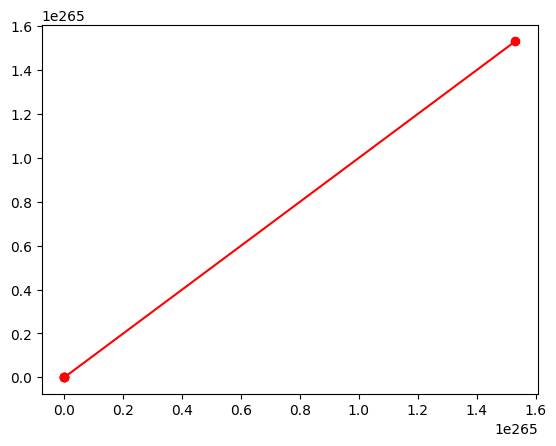

In [62]:
plt.plot(joint1[:, 0], joint1[:, 1], 'r-o', label='Constant Step (alpha=1)')

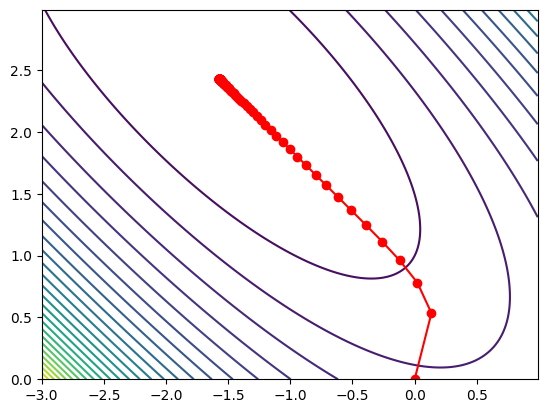

In [63]:
x1 = np.arange(-3, 1, 0.01)
x2 = np.arange(0, 3, 0.01)
X1, X2 = np.meshgrid(x1, x2)
f = np.exp(1 - X1 - X2) + np.exp(X1 + X2 - 1) + X1 ** 2 + X1 * X2 + X2 ** 2 + X1 - 3 * X2
plt.contour(x1, x2, f, 30)
plt.plot(joint2[:, 0], joint2[:, 1], 'r-o', label='alpha=0.1')

## Q3(b)

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] ** 2 + x[0] * x[1] + x[1] ** 2 + x[0] - 3 * x[1]

def grad_f(x):
    grad_x1 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + 2 * x[0] + x[1] + 1
    grad_x2 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] + 2 * x[1] - 3
    return np.array([grad_x1, grad_x2])

def Armijo_line_search(alpha, sigma= 1/2, gamma = 1/2, x = np.array([0, 0]), tolerance = 1e-5, max_iteration = 1000):
    path = [x]
    for i in range(max_iteration):
        gradient = grad_f(x)

        if np.linalg.norm(gradient) <= tolerance:
            break

        current_alpha = alpha 
        while f(x - current_alpha * gradient) > f(x) - gamma * current_alpha * np.dot(gradient, gradient):
            current_alpha *= sigma
        x = x - current_alpha * gradient

        path.append(x)
    path = np.array(path)
    return path, x, i

path1, x1, i1 = Armijo_line_search(alpha=0.1)
path2, x2, i2 = Armijo_line_search(alpha=1)

print('If alpha = 0.1, after ' + str(i1) + ' times,' + ' optimal solution is:' + str(x1) + ', optimum is:' + str(f(x1))
      + '\n'
      'If alpha = 1, after ' + str(i2) + ' times,' + ' optimal solution is:' + str(x2) + ', optimum is:' + str(f(x2)))

If alpha = 0.1, after 120 times, optimal solution is:[-1.57128395  2.42870314], optimum is:-2.285679688702567
If alpha = 1, after 41 times, optimal solution is:[-1.57128616  2.42870438], optimum is:-2.2856796887202115


Text(0.5, 1.0, 'Armijo Line Search Gradient Descent Paths')

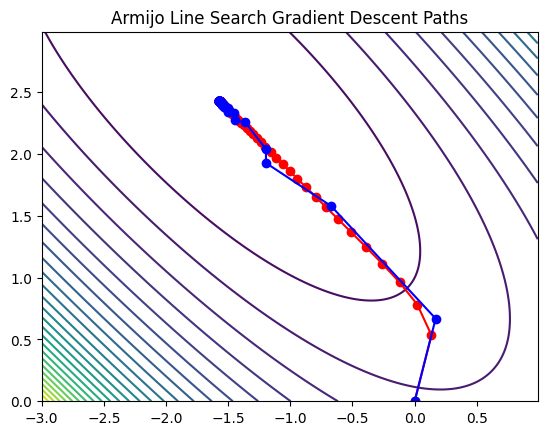

In [87]:
x1 = np.arange(-3, 1, 0.01)
x2 = np.arange(0, 3, 0.01)
X1, X2 = np.meshgrid(x1, x2)
f = np.exp(1 - X1 - X2) + np.exp(X1 + X2 - 1) + X1 ** 2 + X1 * X2 + X2 ** 2 + X1 - 3 * X2
plt.contour(x1, x2, f, 30)
plt.plot(path1[:, 0], path1[:, 1], 'r-o', label='alpha=0.1$')
plt.plot(path2[:, 0], path2[:, 1], 'b-o', label='alpha=1')
plt.title("Armijo Line Search Gradient Descent Paths")

## Q4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] ** 2 + x[0] * x[1] + x[1] ** 2 + x[0] - 3 * x[1]

def grad_f(x):
    grad_x1 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + 2 * x[0] + x[1] + 1
    grad_x2 = -np.exp(1 - x[0] - x[1]) + np.exp(x[0] + x[1] - 1) + x[0] + 2 * x[1] - 3
    return np.array([grad_x1, grad_x2])

def Hessian_f(x):
    exp1 = np.exp(1 - x[0] - x[1])
    exp2 = np.exp(x[0] + x[1] - 1)
    return np.array([
        [exp1 + exp2 + 2, -exp1 + exp2 + 1],
        [-exp1 + exp2 + 1, exp1 + exp2 + 2]])

def Armijo_alpha(alpha, sigma= 1/2, gamma = 1/2, x = np.array([0, 0]), tolerance = 1e-5, max_iteration = 1000):
    gradient = grad_f(x)
    while f(x - alpha * gradient) > f(x) - gamma * alpha * np.dot(gradient, gradient):
        alpha *= sigma
    return alpha

def Newton_method():
    